In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys, re, os
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import RandomForestRegressor
import time

In [8]:
%matplotlib inline

plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 11})

plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 300

In [9]:
exp = f'intervention_global'

In [10]:
chdir = True

In [11]:
import itertools
marker = itertools.cycle(('x',',', '+', '.', 'o', '*'))
cycol = itertools.cycle('bgrcmk')

# Service chain configuration

In [13]:
current_dir = os.getcwd()
file_path = os.path.abspath(f'../datasets/{exp}.csv')
data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
df = data.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12921 entries, 1 to 2848
Data columns (total 63 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   firewall_instructions               12921 non-null  float64
 1   nf_router_instructions              12921 non-null  float64
 2   ndpi_stats_instructions             12921 non-null  float64
 3   payload_scan_instructions           12921 non-null  float64
 4   bridge_instructions                 12921 non-null  float64
 5   firewall_branches                   12921 non-null  float64
 6   nf_router_branches                  12921 non-null  float64
 7   ndpi_stats_branches                 12921 non-null  float64
 8   payload_scan_branches               12921 non-null  float64
 9   bridge_branches                     12921 non-null  float64
 10  firewall_branch-misses              12921 non-null  float64
 11  nf_router_branch-misses             12921 

# Compare data preprocessing

In [14]:
#A：data without clearning + without feature selection + random model + without hyperparameters tunning 

In [15]:
current_dir = os.getcwd()
file_path = os.path.abspath('../datasets/intervention_global.csv')
data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], 0)
df = data.dropna()

In [16]:
# training  
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor 
X = df.drop(['input_rate','output_rate', 'latency',"bridge_LLC-stores","bridge_L1-dcache-load-misses","bridge_instructions",
             "bridge_cache-references","bridge_LLC-loads","bridge_cycles"], axis=1)
y = df['output_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

y_test_indices = y_test.index.tolist()
input_rate_within_y_test = df.loc[y_test_indices, 'input_rate']
latency_within_y_test = df.loc[y_test_indices, 'latency']

# ML model
#model = GradientBoostingRegressor()
model = LinearRegression()
# train the regressor
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# Evaluate
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


R-squared: 0.3797652226332473


In [17]:
#B. data clean + without feature selection + random model +without hyperparameters tunning 

In [18]:
current_dir = os.getcwd()
file_path = os.path.abspath('../datasets/intervention_global.csv')
data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], 0)
df = data.dropna()

In [19]:
# training  
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor 
X = df.drop(['input_rate','output_rate', 'latency'], axis=1)
y = df['output_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

y_test_indices = y_test.index.tolist()
input_rate_within_y_test = df.loc[y_test_indices, 'input_rate']
latency_within_y_test = df.loc[y_test_indices, 'latency']

# ML model
#model = GradientBoostingRegressor()
model = LinearRegression()
# train the regressor
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# Evaluate
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.44083209115545685


In [20]:
#C. data clean + without feature selection + random model +without hyperparameters tunning

In [34]:
current_dir = os.getcwd()
file_path = os.path.abspath('../datasets/intervention_global.csv')
data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
df = data.dropna()

In [35]:
# training  
from sklearn.ensemble import GradientBoostingRegressor 
#X = df.drop(['input_rate','output_rate', 'latency'], axis=1)
X = df.drop(['input_rate','output_rate', 'latency'], axis=1)#,'bridge_bus-cycles','bridge_mem-loads','bridge_iTLB-loads','bridge_mem-stores','bridge_L1-dcache-load-misses','bridge_cache-misses'], axis=1)
y = df['output_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

y_test_indices = y_test.index.tolist()
input_rate_within_y_test = df.loc[y_test_indices, 'input_rate']
latency_within_y_test = df.loc[y_test_indices, 'latency']

# ML model
#model = GradientBoostingRegressor()
model = LinearRegression()
# train the regressor
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# Evaluate
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


R-squared: 0.44083209115545685


In [36]:
#D. data clean + with feature selection + random model +without hyperparameters tunning = 

In [37]:
current_dir = os.getcwd()
file_path = os.path.abspath('../datasets/intervention_global.csv')
file_path = os.path.abspath('../datasets/load_stimulus_linear.csv')
data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
df = data.dropna()

In [38]:
# training 
X = df.drop(["input_rate",'output_rate', 'latency'], axis=1)
#X = df.drop(['output_rate', 'latency','bridge_bus-cycles','bridge_mem-loads','bridge_iTLB-loads','bridge_mem-stores','bridge_L1-dcache-load-misses','bridge_cache-misses'], axis=1)
y = df['output_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

column_order = X_train.columns
X_test = X_test[column_order]


# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(len(y))

35738


In [39]:
# model
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))

model.add(Dense(1))

In [40]:
# Compile the model
start_time = time.time()
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=16, epochs=100, verbose=1)
end_time = time.time()  
elapsed_time = end_time - start_time  
print(elapsed_time )

Epoch 1/100
1564/1564 [==============================] - 5s 3ms/step - loss: 4344345.0000
Epoch 2/100
1564/1564 [==============================] - 5s 3ms/step - loss: 2523193.0000
Epoch 3/100
1564/1564 [==============================] - 5s 3ms/step - loss: 2440024.0000
Epoch 4/100
1564/1564 [==============================] - 5s 3ms/step - loss: 2381579.0000
Epoch 5/100
1564/1564 [==============================] - 5s 3ms/step - loss: 2340871.2500
Epoch 6/100
1564/1564 [==============================] - 5s 3ms/step - loss: 2326211.0000
Epoch 7/100
1564/1564 [==============================] - 5s 3ms/step - loss: 2309790.2500
Epoch 8/100
1564/1564 [==============================] - 5s 3ms/step - loss: 2299053.0000
Epoch 9/100
1564/1564 [==============================] - 5s 3ms/step - loss: 2296806.5000
Epoch 10/100
1564/1564 [==============================] - 5s 3ms/step - loss: 2284047.5000
Epoch 11/100
1564/1564 [==============================] - 5s 3ms/step - loss: 2280450.7500
Epoch 12

1564/1564 [==============================] - 4s 3ms/step - loss: 2117258.7500
Epoch 92/100
1564/1564 [==============================] - 5s 3ms/step - loss: 2121770.7500
Epoch 93/100
1564/1564 [==============================] - 4s 3ms/step - loss: 2116001.7500
Epoch 94/100
1564/1564 [==============================] - 5s 3ms/step - loss: 2114718.7500
Epoch 95/100
1564/1564 [==============================] - 5s 3ms/step - loss: 2115893.2500
Epoch 96/100
1564/1564 [==============================] - 5s 3ms/step - loss: 2115201.7500
Epoch 97/100
1564/1564 [==============================] - 4s 3ms/step - loss: 2113845.2500
Epoch 98/100
1564/1564 [==============================] - 4s 3ms/step - loss: 2112450.5000
Epoch 99/100
1564/1564 [==============================] - 4s 3ms/step - loss: 2117261.7500
Epoch 100/100
1564/1564 [==============================] - 5s 3ms/step - loss: 2110252.5000
474.7630248069763


In [28]:
# Make predictions on the test set
import matplotlib.ticker as mticker

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
 
y_pred=np.array(y_pred)
y_pred = [item for subset in y_pred for item in subset]
y_test=np.array(y_test)

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

122/122 [==============================] - 1s 3ms/step
R-squared: 0.5334057103811426


184.71378111839294


# Optimal

In [105]:
current_dir = os.getcwd()
file_path = os.path.abspath(f'../datasets/{exp}.csv')
data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
df = data.dropna()

In [107]:
# training 
X = df.drop(['output_rate', 'latency'], axis=1)
X = df.drop(['input_rate','output_rate', 'latency','ndpi_stats_branch-load-misses',
            'payload_scan_LLC-load-misses','payload_scan_LLC-load-misses','bridge_LLC-load-misses',
             'bridge_cache-misses','bridge_cache-misses','nf_router_cache-misses','firewall_cache-misses','nf_router_LLC-load-misses',
             'ndpi_stats_LLC-load-misses','nf_router_branch-load-misses','nf_router_branch-misses','payload_scan_branch-load-misses',
            'payload_scan_branch-misses','bridge_branch-misses','ndpi_stats_branch-load-misses','ndpi_stats_cache-misses','firewall_branch-misses','ndpi_stats_branches','firewall_branches','payload_scan_branches','bridge_branches'], axis=1)
y = df['output_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

column_order = X_train.columns
X_test = X_test[column_order]


# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(len(y))

12921


In [108]:
# model
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))

# Add input layer and hidden layers with L2 regularization
#model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.01)))
#model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# Add output layer
model.add(Dense(1))

In [109]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=8, epochs=100, verbose=1)

Epoch 1/100
1131/1131 [==============================] - 4s 3ms/step - loss: 1021574.3750
Epoch 2/100
1131/1131 [==============================] - 3s 3ms/step - loss: 843275.6875
Epoch 3/100
1131/1131 [==============================] - 3s 3ms/step - loss: 812650.6875
Epoch 4/100
1131/1131 [==============================] - 3s 3ms/step - loss: 796186.8125
Epoch 5/100
1131/1131 [==============================] - 3s 2ms/step - loss: 762466.3750
Epoch 6/100
1131/1131 [==============================] - 3s 3ms/step - loss: 738103.9375
Epoch 7/100
1131/1131 [==============================] - 3s 2ms/step - loss: 735213.6250
Epoch 8/100
1131/1131 [==============================] - 3s 2ms/step - loss: 713138.2500
Epoch 9/100
1131/1131 [==============================] - 3s 3ms/step - loss: 691112.5625
Epoch 10/100
1131/1131 [==============================] - 3s 3ms/step - loss: 689160.3125
Epoch 11/100
1131/1131 [==============================] - 3s 3ms/step - loss: 678716.8125
Epoch 12/100
1131/

1131/1131 [==============================] - 3s 3ms/step - loss: 556787.0000
Epoch 93/100
1131/1131 [==============================] - 3s 3ms/step - loss: 552650.3125
Epoch 94/100
1131/1131 [==============================] - 3s 3ms/step - loss: 551285.1875
Epoch 95/100
1131/1131 [==============================] - 3s 3ms/step - loss: 555609.8125
Epoch 96/100
1131/1131 [==============================] - 3s 3ms/step - loss: 553952.6875
Epoch 97/100
1131/1131 [==============================] - 3s 3ms/step - loss: 557259.1875
Epoch 98/100
1131/1131 [==============================] - 4s 3ms/step - loss: 556312.6250
Epoch 99/100
1131/1131 [==============================] - 3s 3ms/step - loss: 549624.8750
Epoch 100/100
1131/1131 [==============================] - 3s 3ms/step - loss: 549298.8750


122/122 [==============================] - 0s 2ms/step


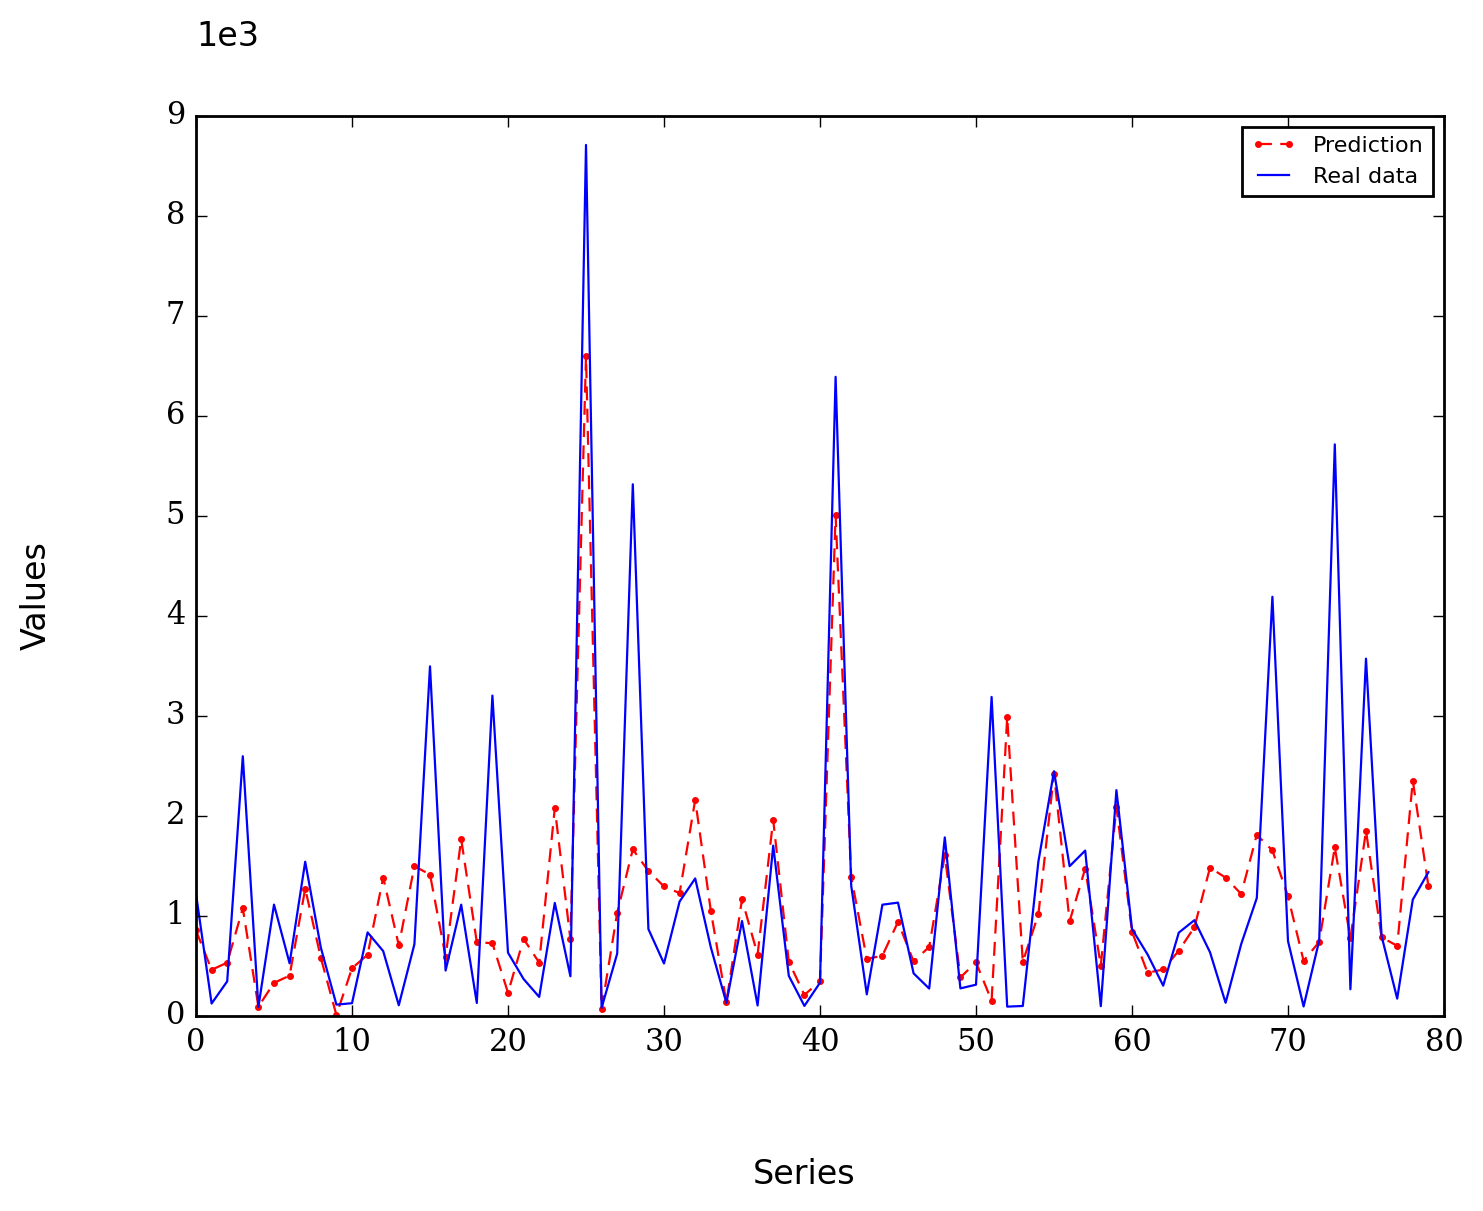

In [110]:
# Make predictions on the test set
import matplotlib.ticker as mticker

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# accuracy
threshold = 0.05  
y_pred=np.array(y_pred)
y_pred = [item for subset in y_pred for item in subset]
y_test=np.array(y_test)

# plot

fig, ax = plt.subplots(facecolor='white', figsize=(8,6))
#ax.set_facecolor('white')
plt.style.use('classic')

plt.plot(y_pred[0:80], marker='o',c='r',markersize = 2, linewidth = 0.8, linestyle='-', markeredgecolor='red', dashes=(5, 3),label='Prediction')
plt.plot(y_test.tolist()[0:80], c='b',linestyle='-',linewidth = 0.8,label='Real data')


plt.legend(loc="upper right", fontsize=8)
fig.text(0.5, 0.01, 'Series', size='12', ha='center')
fig.text(0.01, 0.5, 'Values', size='12', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
#plt.grid()
ax.set_facecolor('white')

# Set y-axis tick format
formatter = mticker.FuncFormatter(lambda x, pos: f"{int(x/1000)}")
ax.yaxis.set_major_formatter(formatter)
# Set text in the upper left corner of the figure
fig.text(0.12, 0.98, '1e3', size='12', ha='left', va='top')


plt.show()

In [111]:
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.5257676290750178


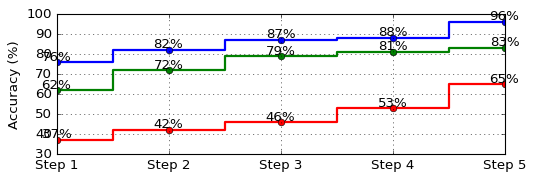

In [115]:
import matplotlib.pyplot as plt

# Data to be plotted
performance_bridge = [76,82,87,88,96]
performance_linear = [62,72,79,81,83]
performance_intervention = [37,42,46,53,65]
steps = ['Step 1', 'Step 2', 'Step 3', 'Step 4', 'Step 5']

# Plotting the step pipeline
fig, ax = plt.subplots(facecolor='white', figsize=(7, 2.5))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)
plt.step(steps, performance, where='mid', linewidth=2, marker='o')
plt.step(steps, performance_linear, where='mid', linewidth=2, marker='o')
plt.step(steps, performance_intervention, where='mid', linewidth=2, marker='o')
#plt.xlabel('Steps')
plt.ylabel('Accuracy (%)')
#plt.title('Performance Improvement at Each Step')
#plt.ylim(60, 100)  # Setting the y-axis limits to better visualize the performance

# Adding the performance values on top of each point
for x, y in zip(steps, performance):
    plt.text(x, y + 1, f'{y}%', ha='center')
for x, y in zip(steps, performance_linear):
    plt.text(x, y + 1, f'{y}%', ha='center')
for x, y in zip(steps, performance_intervention):
    plt.text(x, y + 1, f'{y}%', ha='center')
plt.grid(True)
plt.savefig('accuracy_step.pdf',bbox_inches='tight')
plt.show()


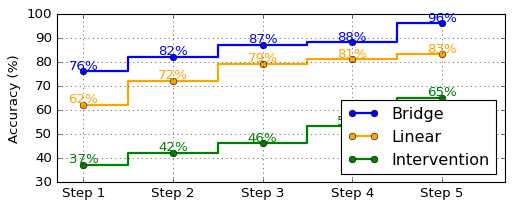

In [124]:
import matplotlib.pyplot as plt

# Data to be plotted
performance_bridge = [76, 82, 87, 88, 96]
performance_linear = [62, 72, 79, 81, 83]
performance_intervention = [37, 42, 46, 53, 65]
steps = ['Step 1', 'Step 2', 'Step 3', 'Step 4', 'Step 5']

# Colors for the plot lines
colors = ['blue', 'orange', 'green']

# Plotting the step pipeline
fig, ax = plt.subplots(facecolor='white', figsize=(7, 3))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)

# Plotting each performance line
plt.step(steps, performance_bridge, where='mid', linewidth=2, marker='o', label='Bridge', color=colors[0])
plt.step(steps, performance_linear, where='mid', linewidth=2, marker='o', label='Linear', color=colors[1])
plt.step(steps, performance_intervention, where='mid', linewidth=2, marker='o', label='Intervention', color=colors[2])
plt.ylabel('Accuracy (%)')

# Adding the performance values on top of each point
for x, y in zip(steps, performance_bridge):
    plt.text(x, y + 1, f'{y}%', ha='center', color=colors[0])
for x, y in zip(steps, performance_linear):
    plt.text(x, y + 1, f'{y}%', ha='center', color=colors[1])
for x, y in zip(steps, performance_intervention):
    plt.text(x, y + 1, f'{y}%', ha='center', color=colors[2])

plt.grid(True)
plt.legend(loc='lower right')

# Expanding x-axis limits to create space on the sides
plt.xlim(-0.3, len(steps) - 0.3)
plt.show()


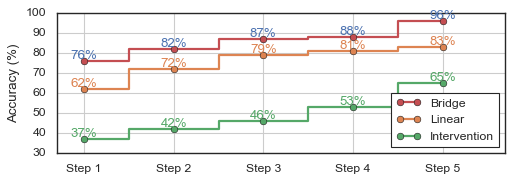

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(facecolor='white', figsize=(7, 2.5))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)

# Data to be plotted
performance_bridge = [76, 82, 87, 88, 96]
performance_linear = [62, 72, 79, 81, 83]
performance_intervention = [37, 42, 46, 53, 65]
steps = ['Step 1', 'Step 2', 'Step 3', 'Step 4', 'Step 5']


# Plotting each performance line with seaborn colors
plt.step(steps, performance_bridge, where='mid', linewidth=2, marker='o', label='Bridge', c="r")
plt.step(steps, performance_linear, where='mid', linewidth=2, marker='o', label='Linear', color=sns.color_palette()[1])
plt.step(steps, performance_intervention, where='mid', linewidth=2, marker='o', label='Intervention', color=sns.color_palette()[2])
plt.ylabel('Accuracy (%)')

# Adding the performance values on top of each point
for x, y in zip(steps, performance_bridge):
    plt.text(x, y + 1, f'{y}%', ha='center', color=sns.color_palette()[0])
for x, y in zip(steps, performance_linear):
    plt.text(x, y + 1, f'{y}%', ha='center', color=sns.color_palette()[1])
for x, y in zip(steps, performance_intervention):
    plt.text(x, y + 1, f'{y}%', ha='center', color=sns.color_palette()[2])

plt.grid(True)
plt.legend(loc='lower right')

# Expanding x-axis limits to create space on the sides
plt.xlim(-0.3, len(steps) - 0.3)

plt.savefig('accuracy_step_seaborn.pdf', bbox_inches='tight')
plt.show()


C:\Users\Qiong\AppData\Local\Temp\ipykernel_21704\2761236234.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(steps, fontsize=14)


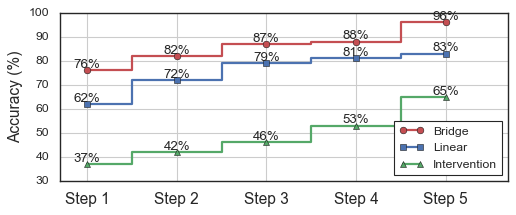

In [165]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# Data to be plotted
performance_bridge = [76, 82, 87, 88, 96]
performance_linear = [62, 72, 79, 81, 83]
performance_intervention = [37, 42, 46, 53, 65]
steps = ['Step 1', 'Step 2', 'Step 3', 'Step 4', 'Step 5']

# Plotting the step pipeline
fig, ax = plt.subplots(facecolor='white', figsize=(7,3))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)

# Plot each performance line
plt.step(steps, performance_bridge, where='mid', linewidth=2, marker='o', label='Bridge',color = "r")
plt.step(steps, performance_linear, where='mid', linewidth=2, marker='s', label='Linear',color = "b")
plt.step(steps, performance_intervention, where='mid', linewidth=2, marker='^', label='Intervention',color ="g")

# Adding labels and title
plt.ylabel('Accuracy (%)',size='14')

# Adding the performance values on top of each point
for x, y in zip(steps, performance_bridge):
    plt.text(x, y + 1, f'{y}%', ha='center')
for x, y in zip(steps, performance_linear):
    plt.text(x, y + 1, f'{y}%', ha='center')
for x, y in zip(steps, performance_intervention):
    plt.text(x, y +1, f'{y}%', ha='center')  # Adjusted for clarity

# Adjusting the y-axis limits and adding grid
plt.ylim(30, 100)  # Adjusted for better visualization
plt.grid(True)
# Adjusting font size of the x-axis labels (steps)
ax.set_xticklabels(steps, fontsize=14)

plt.legend(loc = 'lower right')
plt.xlim(-0.3, len(steps) - 0.3)
# Saving and showing the plot
plt.show()


C:\Users\Qiong\AppData\Local\Temp\ipykernel_21704\2161170105.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(steps, fontsize=14)


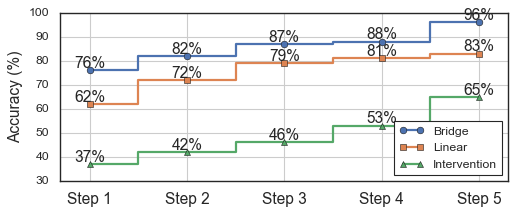

In [166]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Data to be plotted
performance_bridge = [76, 82, 87, 88, 96]
performance_linear = [62, 72, 79, 81, 83]
performance_intervention = [37, 42, 46, 53, 65]
steps = ['Step 1', 'Step 2', 'Step 3', 'Step 4', 'Step 5']

# Plotting the step pipeline
fig, ax = plt.subplots(facecolor='white', figsize=(7, 3))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)

# Plot each performance line
plt.step(steps, performance_bridge, where='mid', linewidth=2, marker='o', label='Bridge')
plt.step(steps, performance_linear, where='mid', linewidth=2, marker='s', label='Linear')
plt.step(steps, performance_intervention, where='mid', linewidth=2, marker='^', label='Intervention')

# Adding labels and title
plt.ylabel('Accuracy (%)', fontsize=14)

# Adding the performance values on top of each point
for x, y in zip(steps, performance_bridge):
    plt.text(x, y + 1, f'{y}%', ha='center', fontsize=14)
for x, y in zip(steps, performance_linear):
    plt.text(x, y + 1, f'{y}%', ha='center', fontsize=14)
for x, y in zip(steps, performance_intervention):
    plt.text(x, y + 1, f'{y}%', ha='center', fontsize=14)

# Adjusting the y-axis limits and adding grid
plt.ylim(30, 100)  # Adjusted for better visualization
plt.grid(True)

# Adjusting font size of the x-axis and y-axis labels
ax.set_xticklabels(steps, fontsize=14)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))  # Y-axis labels as integers
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))  # Y-axis ticks at every 10 units

# Adding a legend
plt.legend(loc='lower right')

# Adjusting the x-axis limits
plt.xlim(-0.3, len(steps) - 0.7)

# Adding borders around the plot
for spine in ax.spines.values():
    spine.set_visible(True)

# Uncomment the following line to display the plot
# plt.show()


C:\Users\Qiong\AppData\Local\Temp\ipykernel_21704\2349482672.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(steps, fontsize=14)
C:\Users\Qiong\AppData\Local\Temp\ipykernel_21704\2349482672.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels( ylabels,fontsize=14)


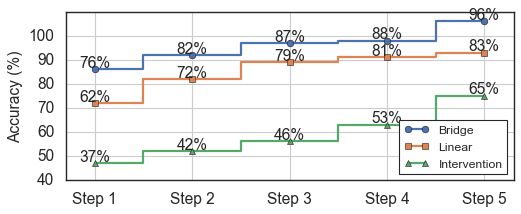

In [172]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Data to be plotted
performance_bridge = [76, 82, 87, 88, 96]
performance_linear = [62, 72, 79, 81, 83]
performance_intervention = [37, 42, 46, 53, 65]
steps = ['Step 1', 'Step 2', 'Step 3', 'Step 4', 'Step 5']
ylabels=[20,40,50,60,70,80,90,100]
# Plotting the step pipeline
fig, ax = plt.subplots(facecolor='white', figsize=(7, 3))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)

# Plot each performance line
plt.step(steps, performance_bridge, where='mid', linewidth=2, marker='o', label='Bridge')
plt.step(steps, performance_linear, where='mid', linewidth=2, marker='s', label='Linear')
plt.step(steps, performance_intervention, where='mid', linewidth=2, marker='^', label='Intervention')

# Adding labels and title
plt.ylabel('Accuracy (%)', fontsize=14)

# Adding the performance values on top of each point
for x, y in zip(steps, performance_bridge):
    plt.text(x, y + 1, f'{y}%', ha='center', fontsize=14)
for x, y in zip(steps, performance_linear):
    plt.text(x, y + 1, f'{y}%', ha='center', fontsize=14)
for x, y in zip(steps, performance_intervention):
    plt.text(x, y + 1, f'{y}%', ha='center', fontsize=14)

# Adjusting the y-axis limits and adding grid
#plt.ylim(30, 100)  # Adjusted for better visualization
plt.grid(True)

# Adjusting font size of the x-axis and y-axis labels
ax.set_xticklabels(steps, fontsize=14)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))  # Y-axis labels as integers
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))  # Y-axis ticks at every 10 units
ax.set_yticklabels( ylabels,fontsize=14)
# Adding a legend
plt.legend(loc='lower right')

# Adjusting the x-axis limits
plt.xlim(-0.3, len(steps) - 0.7)

# Adding borders around the plot
for spine in ax.spines.values():
    spine.set_visible(True)

# Uncomment the following line to display the plot
# plt.show()


C:\Users\Qiong\AppData\Local\Temp\ipykernel_21704\857631343.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(steps, fontsize=14)
C:\Users\Qiong\AppData\Local\Temp\ipykernel_21704\857631343.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels, fontsize=14)


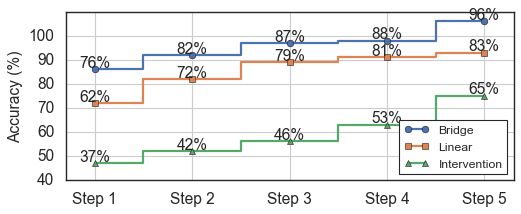

In [173]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Data to be plotted
performance_bridge = [76, 82, 87, 88, 96]
performance_linear = [62, 72, 79, 81, 83]
performance_intervention = [37, 42, 46, 53, 65]
steps = ['Step 1', 'Step 2', 'Step 3', 'Step 4', 'Step 5']
ylabels = [20, 40, 50, 60, 70, 80, 90, 100]

# Plotting the step pipeline
fig, ax = plt.subplots(facecolor='white', figsize=(7, 3))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)

# Plot each performance line
plt.step(steps, performance_bridge, where='mid', linewidth=2, marker='o', label='Bridge')
plt.step(steps, performance_linear, where='mid', linewidth=2, marker='s', label='Linear')
plt.step(steps, performance_intervention, where='mid', linewidth=2, marker='^', label='Intervention')

# Adding labels and title
plt.ylabel('Accuracy (%)', fontsize=14)

# Adding the performance values on top of each point
for x, y in zip(steps, performance_bridge):
    plt.text(x, y + 1, f'{y}%', ha='center', fontsize=14)
for x, y in zip(steps, performance_linear):
    plt.text(x, y + 1, f'{y}%', ha='center', fontsize=14)
for x, y in zip(steps, performance_intervention):
    plt.text(x, y + 1, f'{y}%', ha='center', fontsize=14)

# Adjusting the y-axis limits and adding grid
# plt.ylim(30, 100)  # Adjusted for better visualization
plt.grid(True)

# Adjusting font size of the x-axis and y-axis labels
ax.set_xticklabels(steps, fontsize=14)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))  # Y-axis labels as integers
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))  # Y-axis ticks at every 10 units
ax.set_yticklabels(ylabels, fontsize=14)

# Adding a legend
plt.legend(loc='lower right')

# Adjusting the x-axis limits
plt.xlim(-0.3, len(steps) - 0.7)

# Display the plot
plt.show()
